In [3]:
# Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from matplotlib.pyplot import pie, axis, show
from sklearn import preprocessing

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#import plotly.plotly as py
#import plotly.graph_objs as go

In [4]:
# Import the csv file

policy_data = pd.read_csv('policy_data.csv')

In [5]:
# Filter the data for 2013 and 2014

policy_data_filtered = policy_data[policy_data['Underwriting_Year'] > 2012]

policy_data_filtered.shape

(215313, 67)

In [7]:
# Check for duplicates and drop duplicate records

# Drop the first column as it contains the rownumber, because of which dulictons will be ignored
policy_data_wo_dup = policy_data_filtered#.drop('Unnamed: 0',axis=1)

# Remove duplicates at Oerall Level
policy_data_wo_dup.drop_duplicates()

# Get the number of Records and Features in the New Data
policy_data_wo_dup.shape

(215313, 67)

In [8]:
# Drop the redundant features from the raw data

policy_data_wo_dup_1 = policy_data_wo_dup.drop( ['Public_Liability_Limit_1000000',
                   'Public_Liability_Limit_1000000.1','Public_Liability_Limit_2000000','Public_Liability_Limit_5000000',
                    'Public_Liability_Limit_5000000.1','Public_Liability_Limit_1000000.2','Public_Liability_Limit_1000000.3',
                    'Employers_Liability_Limit_1000','Professional_Indemnity_Limit_5','Professional_Indemnity_Limit_5.1',
                    'Professional_Indemnity_Limit_1','Professional_Indemnity_Limit_1.1','Professional_Indemnity_Limit_2',
                    'Professional_Indemnity_Limit_2.1','Professional_Indemnity_Limit_5.2','Professional_Indemnity_Limit_5.3',
                    'Professional_Indemnity_Limit_1.2','Professional_Indemnity_Limit_1.3','Professional_Indemnity_Limit_2.2',
                    'Professional_Indemnity_Limit_2.3','Public_Liability_Limit_5000000.2', 'Public_Liability_Limit_5000000.3' 
                  ], axis = 1)

In [9]:
# Check and Remove Duplicate Records

policy_data_wo_dup_2 = policy_data_wo_dup_1.drop_duplicates()

policy_data_wo_dup_2.shape

(215097, 45)

In [10]:
# Drop the irrelevant Fields - CancellationEffectiveDate

policy_data_2 = policy_data_wo_dup_2.drop(['CancellationEffectiveDate'], axis=1)

# Check whether the field is dropped

policy_data_2.shape

(215097, 44)

In [11]:
policy_data_2.head()

,Source_System,Product,Underwriting_Year,Effective_Date,Expiry_Date,Transaction_Type,Public_Liability_Limit,Employers_Liability_Limit,Tools_Sum_Insured,Professional_Indemnity_Limit,...,Hired_in_Plan_Sum_Insured_Ind,Own_Plant_Sum_Insured_Ind,Location,Professional_Indemnity_Limit_g,Risk_Postcode2,TotalEmployees,Claim_Count,Claim_Incurred,Capped_Incurred_(£50k),Capped_Incurred_(£100k)
0,Simply Business,Maltings Tradesman,2014,19/09/2014 1:00,18/09/2015 1:00,New Business,1000000,0,0.0,50000,...,0,0,BRIGHTON,1,BN21 3,1,0,0.0,0.0,0.0
1,Simply Business,Maltings Tradesman,2014,8/10/2014 1:00,7/10/2015 1:00,New Business,5000000,0,0.0,0,...,0,0,BRISTOL,0,BS15 4,1,0,0.0,0.0,0.0
2,Simply Business,Maltings Tradesman,2014,18/09/2014 1:00,17/09/2015 1:00,New Business,5000000,10000000,4000.0,0,...,0,0,NORTHAMPTON,0,NN10 8,8,0,0.0,0.0,0.0
3,Simply Business,Maltings Tradesman,2014,3/10/2014 1:00,2/10/2015 1:00,New Business,2000000,0,2000.0,0,...,0,0,CAMBRIDGE,0,CB8 7,10,0,0.0,0.0,0.0
4,Simply Business,Maltings Tradesman,2014,20/09/2014 1:00,19/09/2015 1:00,New Business,1000000,0,0.0,1000000,...,0,0,NEWCASTLE UPON TYNE,1,NE5 1,1,0,0.0,0.0,0.0


In [464]:
#policy_data_2['Location'] = policy_data_3['Location'].astype('object')

policy_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215097 entries, 0 to 232961
Data columns (total 44 columns):
Source_System                     215097 non-null object
Product                           215097 non-null object
Underwriting_Year                 215097 non-null int64
Effective_Date                    215097 non-null object
Expiry_Date                       215097 non-null object
Transaction_Type                  215097 non-null object
Public_Liability_Limit            215097 non-null int64
Employers_Liability_Limit         215097 non-null int64
Tools_Sum_Insured                 215097 non-null float64
Professional_Indemnity_Limit      215097 non-null int64
Contract_Works_Sum_Insured        215097 non-null int64
Hired_in_Plan_Sum_Insured         215097 non-null int64
Own_Plant_Sum_Insured             215097 non-null int64
Trade_1                           215097 non-null object
Trade_2                           203067 non-null object
Manual_EE                         215097

In [12]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Source_System','Product',"Trade_1_Category","Transaction_Type",'Risk_Postcode2']
for col in cat_vars:
    policy_data_2[col]=labelEnc.fit_transform(policy_data_2[col])
    

policy_data_2.head()

,Source_System,Product,Underwriting_Year,Effective_Date,Expiry_Date,Transaction_Type,Public_Liability_Limit,Employers_Liability_Limit,Tools_Sum_Insured,Professional_Indemnity_Limit,...,Hired_in_Plan_Sum_Insured_Ind,Own_Plant_Sum_Insured_Ind,Location,Professional_Indemnity_Limit_g,Risk_Postcode2,TotalEmployees,Claim_Count,Claim_Incurred,Capped_Incurred_(£50k),Capped_Incurred_(£100k)
0,1,2,2014,19/09/2014 1:00,18/09/2015 1:00,0,1000000,0,0.0,50000,...,0,0,BRIGHTON,1,815,1,0,0.0,0.0,0.0
1,1,2,2014,8/10/2014 1:00,7/10/2015 1:00,0,5000000,0,0.0,0,...,0,0,BRISTOL,0,918,1,0,0.0,0.0,0.0
2,1,2,2014,18/09/2014 1:00,17/09/2015 1:00,0,5000000,10000000,4000.0,0,...,0,0,NORTHAMPTON,0,7462,8,0,0.0,0.0,0.0
3,1,2,2014,3/10/2014 1:00,2/10/2015 1:00,0,2000000,0,2000.0,0,...,0,0,CAMBRIDGE,0,1685,10,0,0.0,0.0,0.0
4,1,2,2014,20/09/2014 1:00,19/09/2015 1:00,0,1000000,0,0.0,1000000,...,0,0,NEWCASTLE UPON TYNE,1,7270,1,0,0.0,0.0,0.0


In [13]:
# Define the target variable
policy_data_2['target'] = np.where((policy_data_2.Claim_Count) > 0,1,0)


In [14]:
# Scale all the numeric variables to make mean = 0 and stddev = 1

policy_data_2['Tools_Sum_Insured_Sc'] = preprocessing.scale(policy_data_2['Tools_Sum_Insured'])
policy_data_2['Contract_Works_Sum_Insured_Sc'] = preprocessing.scale(policy_data_2['Contract_Works_Sum_Insured'])
policy_data_2['Hired_in_Plan_Sum_Insured_Sc'] = preprocessing.scale(policy_data_2['Hired_in_Plan_Sum_Insured'])
policy_data_2['Own_Plant_Sum_Insured_Sc'] = preprocessing.scale(policy_data_2['Own_Plant_Sum_Insured'])
policy_data_2['Commission_Amount_Sc'] = preprocessing.scale(policy_data_2['Commission_Amount'])
policy_data_2['Gross_Premium_Excl_PI_Sc'] = preprocessing.scale(policy_data_2['Gross_Premium_Excl_PI'])
policy_data_2['DurationofPolicy_Sc'] = preprocessing.scale(policy_data_2['DurationofPolicy'])

L:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [17]:
# Drop the columns which are not reuired for modelling purpose

policy_data_3 = policy_data_2.drop(['Underwriting_Year','Effective_Date','Expiry_Date' ,'Location', 'Trade_1','Trade_2',
                                    'Match_Type',
                                    'Claim_Count','Claim_Incurred','TotalEmployees',
                                    'Capped_Incurred_(£50k)', 
                                    'Trade_2_Category',
                                    'Trade_2_Risk_Level','Effective_Date2','Total_Gross_Premium_excl_IPT','Commission_Amount',
                                    'Net_Premium_to_UW','Policy_Count',
                                    'Tools_Sum_Insured_Ind','Contract_Works_Sum_Insured_Ind',
                                    'Hired_in_Plan_Sum_Insured_Ind','Own_Plant_Sum_Insured_Ind','Professional_Indemnity_Limit_g',
                                    'TotalEmployees',
                                    'Capped_Incurred_(£100k)',
                                    'Gross_PI_Premium','Source_System',
                                    #'Risk_Postcode2',
                                   'Tools_Sum_Insured','Contract_Works_Sum_Insured','Hired_in_Plan_Sum_Insured',
                                    'Own_Plant_Sum_Insured',
                                    #'Manual_EE','Clerical_EE','Subcontractor_EE',
                                    'Commission_Amount',
                                    'Gross_Premium_Excl_PI','DurationofPolicy'
                                   ], axis = 1)

policy_data_3.head()

,Product,Transaction_Type,Public_Liability_Limit,Employers_Liability_Limit,Professional_Indemnity_Limit,Manual_EE,Clerical_EE,Subcontractor_EE,Trade_1_Category,Trade_1_Risk_Level,CombinedTradeRiskLevel,Risk_Postcode2,target,Tools_Sum_Insured_Sc,Contract_Works_Sum_Insured_Sc,Hired_in_Plan_Sum_Insured_Sc,Own_Plant_Sum_Insured_Sc,Commission_Amount_Sc,Gross_Premium_Excl_PI_Sc,DurationofPolicy_Sc
0,2,0,1000000,0,50000,1,0,0,1,2,2,815,0,-0.297646,-0.105433,-0.107503,-0.079561,-0.016551,-0.054431,-0.053172
1,2,0,5000000,0,0,1,0,0,1,3,3,918,0,-0.297646,-0.105433,-0.107503,-0.079561,-0.410642,-0.300458,-0.053172
2,2,0,5000000,10000000,0,1,7,0,8,7,7,7462,0,2.982866,-0.105433,-0.107503,-0.079561,1.285907,1.410936,-0.053172
3,2,0,2000000,0,0,6,4,0,10,2,2,1685,0,1.342610,-0.105433,-0.107503,-0.079561,0.234733,0.350576,-0.053172
4,2,0,1000000,0,1000000,1,0,0,10,1,1,7270,0,-0.297646,-0.105433,-0.107503,-0.079561,-0.092101,-0.421017,-0.053172


In [18]:
list(policy_data_3.columns.values)

['Product',
 'Transaction_Type',
 'Public_Liability_Limit',
 'Employers_Liability_Limit',
 'Professional_Indemnity_Limit',
 'Manual_EE',
 'Clerical_EE',
 'Subcontractor_EE',
 'Trade_1_Category',
 'Trade_1_Risk_Level',
 'CombinedTradeRiskLevel',
 'Risk_Postcode2',
 'target',
 'Tools_Sum_Insured_Sc',
 'Contract_Works_Sum_Insured_Sc',
 'Hired_in_Plan_Sum_Insured_Sc',
 'Own_Plant_Sum_Insured_Sc',
 'Commission_Amount_Sc',
 'Gross_Premium_Excl_PI_Sc',
 'DurationofPolicy_Sc']

In [19]:
# COnvert the columns into categorical format

policy_data_3['Product'] = policy_data_3['Product'].astype('category')
policy_data_3['Transaction_Type'] = policy_data_3['Transaction_Type'].astype('category')
policy_data_3['Trade_1_Category'] = policy_data_3['Trade_1_Category'].astype('category')
policy_data_3['Trade_1_Risk_Level'] = policy_data_3['Trade_1_Risk_Level'].astype('category')
policy_data_3['Risk_Postcode2'] = policy_data_3['Risk_Postcode2'].astype('category')

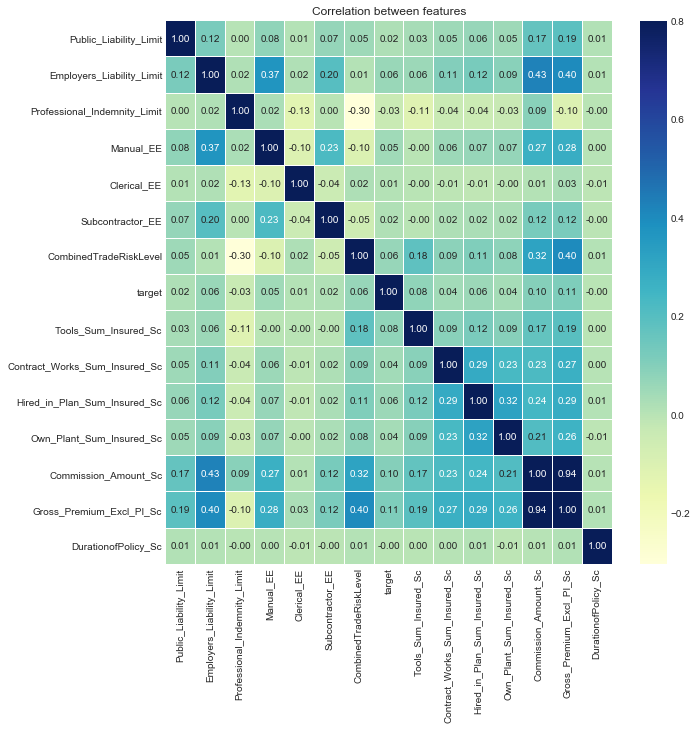

In [20]:
# Plot the correlation Matrix

corr=policy_data_3.corr()
plt.figure(figsize=(10, 10))

#sns.heatmap(corr, vmax=.8, linewidths=0.01,
           # square=True,annot=True,cmap='YlGnBu',linecolor="white")

graph = sns.heatmap(corr,vmax=.8, linewidths=0.01,annot=True, fmt = ".2f", cmap = "YlGnBu")
plt.title('Correlation between features');

In [21]:
policy_data_3.corr()["target"]


# Since Gross_Prem and Commission_Amount has a high correlation and also 
# since Gross Prem has a higher correlation wit the target variable, consider Gross Prem for Model Bulding Purpose

policy_data_4 = policy_data_3.drop(['Commission_Amount_Sc'], axis = 1)

policy_data_4.head()

,Product,Transaction_Type,Public_Liability_Limit,Employers_Liability_Limit,Professional_Indemnity_Limit,Manual_EE,Clerical_EE,Subcontractor_EE,Trade_1_Category,Trade_1_Risk_Level,CombinedTradeRiskLevel,Risk_Postcode2,target,Tools_Sum_Insured_Sc,Contract_Works_Sum_Insured_Sc,Hired_in_Plan_Sum_Insured_Sc,Own_Plant_Sum_Insured_Sc,Gross_Premium_Excl_PI_Sc,DurationofPolicy_Sc
0,2,0,1000000,0,50000,1,0,0,1,2,2,815,0,-0.297646,-0.105433,-0.107503,-0.079561,-0.054431,-0.053172
1,2,0,5000000,0,0,1,0,0,1,3,3,918,0,-0.297646,-0.105433,-0.107503,-0.079561,-0.300458,-0.053172
2,2,0,5000000,10000000,0,1,7,0,8,7,7,7462,0,2.982866,-0.105433,-0.107503,-0.079561,1.410936,-0.053172
3,2,0,2000000,0,0,6,4,0,10,2,2,1685,0,1.342610,-0.105433,-0.107503,-0.079561,0.350576,-0.053172
4,2,0,1000000,0,1000000,1,0,0,10,1,1,7270,0,-0.297646,-0.105433,-0.107503,-0.079561,-0.421017,-0.053172


In [22]:
policy_data_4.columns

Index(['Product', 'Transaction_Type', 'Public_Liability_Limit',
       'Employers_Liability_Limit', 'Professional_Indemnity_Limit',
       'Manual_EE', 'Clerical_EE', 'Subcontractor_EE', 'Trade_1_Category',
       'Trade_1_Risk_Level', 'CombinedTradeRiskLevel', 'Risk_Postcode2',
       'target', 'Tools_Sum_Insured_Sc', 'Contract_Works_Sum_Insured_Sc',
       'Hired_in_Plan_Sum_Insured_Sc', 'Own_Plant_Sum_Insured_Sc',
       'Gross_Premium_Excl_PI_Sc', 'DurationofPolicy_Sc'],
      dtype='object')

In [23]:
X = policy_data_4[[
 'Product', 'Transaction_Type', 'Public_Liability_Limit',
       'Employers_Liability_Limit', 'Professional_Indemnity_Limit',
       'Manual_EE', 'Clerical_EE', 'Subcontractor_EE', 'Trade_1_Category',
       'Trade_1_Risk_Level', 'CombinedTradeRiskLevel', 'Risk_Postcode2',
        'Tools_Sum_Insured_Sc', 'Contract_Works_Sum_Insured_Sc',
       'Hired_in_Plan_Sum_Insured_Sc', 'Own_Plant_Sum_Insured_Sc',
       'Gross_Premium_Excl_PI_Sc', 'DurationofPolicy_Sc']]
y = policy_data_4[['target']]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150567, 18) (64530, 18) (150567, 1) (64530, 1)


In [514]:
y_train.target.value_counts()

0    148534
1      2033
Name: target, dtype: int64

In [515]:
y_test.target.value_counts()

0    63602
1      928
Name: target, dtype: int64

In [25]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [26]:
clf = LogisticRegression(max_iter=200, random_state=42, class_weight= 'balanced')
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)

L:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
pred = clf.predict_proba(X_test)

In [28]:
preds = pd.DataFrame(data=pred, columns=['Class_0', 'Class_1'])
preds.head()

,Class_0,Class_1
0,0.588707,0.411293
1,0.330479,0.669521
2,0.317218,0.682782
3,0.495666,0.504334
4,0.830706,0.169294


In [29]:
preds['Class'] =  np.where(preds.Class_1 > 0.51, 1, 0)
preds.head()

,Class_0,Class_1,Class
0,0.588707,0.411293,0
1,0.330479,0.669521,1
2,0.317218,0.682782,1
3,0.495666,0.504334,0
4,0.830706,0.169294,0


In [30]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (5,5), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

Sensitivity or Recall :  0.4676724137931034
Specificity :  0.7671928555705796
Precision :  0.028475821796470048


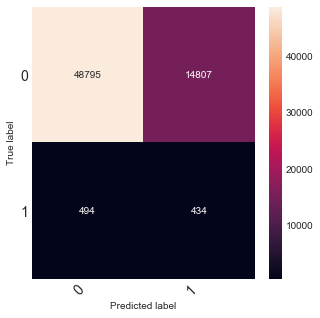

In [522]:
%matplotlib inline
cm = confusion_matrix(y_test,preds.Class)
print_confusion_matrix(cm,[0,1])

sensitivity=cm[1,1]/(cm[1,1] + cm[1,0])
specificity=cm[0,0]/(cm[0,0] + cm[0,1])
precision=cm[1,1]/(cm[1,1] + cm[0,1])

print ('Sensitivity or Recall : ', sensitivity)
print ('Specificity : ', specificity)
print ('Precision : ', precision)

In [31]:
# ROC-AUC Curve
from sklearn.metrics import roc_curve, auc

In [32]:
# compute fpr, tpr, thresholds and roc_auc
fpr, tpr, thresholds = roc_curve(y_test,preds.Class_1)
roc_auc = auc(fpr, tpr) # compute area under the curve
 
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
 
# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
#plt.show()

plt.savefig('roc_and_threshold.png')
plt.close()

In [69]:
# Updaitng the threshold
preds['Class'] =  np.where(preds.Class_1 > 0.46, 1, 0)
preds.head()

,Class_0,Class_1,Class
0,0.588707,0.411293,0
1,0.330479,0.669521,1
2,0.317218,0.682782,1
3,0.495666,0.504334,1
4,0.830706,0.169294,0


Sensitivity or Recall :  0.683189655172
Specificity :  0.50224835697
Precision :  0.0196333457203


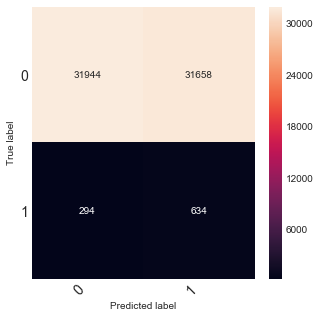

In [70]:
%matplotlib inline
cm = confusion_matrix(y_test,preds.Class)
print_confusion_matrix(cm,[0,1])

sensitivity=cm[1,1]/(cm[1,1] + cm[1,0])
specificity=cm[0,0]/(cm[0,0] + cm[0,1])
precision=cm[1,1]/(cm[1,1] + cm[0,1])

print ('Sensitivity or Recall : ', sensitivity)
print ('Specificity : ', specificity)
print ('Precision : ', precision)

In [397]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_predict

import numpy as np
predictors = [
 'Product', 'Transaction_Type', 'Public_Liability_Limit', 'Employers_Liability_Limit', 'Professional_Indemnity_Limit',
 'Match_Type', 'Trade_1_Category', 'Trade_1_Risk_Level', 
    #'Tools_Sum_Insured_Ind','Contract_Works_Sum_Insured_Ind', 'Hired_in_Plan_Sum_Insured_Ind', 'Own_Plant_Sum_Insured_Ind',
    #'Professional_Indemnity_Limit_g',
 'Manual_EE_Sc', 'Clerical_EE_Sc', 'Subcontractor_EE_Sc', 'Gross_Premium_Excl_PI_Sc', 'DurationofPolicy_Sc']

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
rf = RandomForestClassifier(random_state=1, n_estimators=30, 
                            #min_samples_split=2, 
                            min_samples_leaf=3)
kf = KFold(policy_data_3.shape[0], n_folds=5, random_state=1)
#cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)

predictions = cross_validation.cross_val_predict(rf, X_train[predictors],policy_data_3["target"],cv=kf)
predictions = pd.Series(predictions)
scores = cross_val_score(rf, policy_data_3[predictors], policy_data_3["target"],
                                          scoring='precision', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.



0.0


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

